In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load Data
mobiles = pd.read_csv('mobile.csv')
mobiles.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [12]:
# Cek apakah dataset mengandung nilai null
mobiles.info(verbose='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


Perhatikan bahwa tidak ada data yang null sehingga tidak perlu menangani data null.

In [13]:
# Mencari korelasi linear kolom-kolom pada dataset dengan price_range
korelasi = []
ind = 0
for i in mobiles.columns:
    if i != 'price_range':
        korelasi.append([i,mobiles[i].corr(mobiles['price_range'], method='pearson')])
    
df_korelasi = pd.DataFrame(korelasi, columns=['fitur', 'pearson'])
print(df_korelasi.sort_values('pearson',ascending=False))

            fitur   pearson
13            ram  0.917046
0   battery_power  0.200723
12       px_width  0.165818
11      px_height  0.148858
6      int_memory  0.044435
15           sc_w  0.038711
10             pc  0.033599
17        three_g  0.023611
14           sc_h  0.022986
4              fc  0.021998
16      talk_time  0.021859
1            blue  0.020573
19           wifi  0.018785
3        dual_sim  0.017444
5          four_g  0.014772
9         n_cores  0.004399
7           m_dep  0.000853
2     clock_speed -0.006606
8       mobile_wt -0.030302
18   touch_screen -0.030411


Perhatikan hanya ada 1 kolom yang berkorelasi kuat dengan price_range, yaitu ram dengan koefisien korelasi 0.9170457362649905. Selain itu ada 3 kandidat lainnya yang berkorelasi meski tidak sekuat 'ram' yaitu 'battery_power', 'px_width', dan 'px_heigth'. keempat fitur ini akan kami masukan kedalam model Machine Learning yang akan kami buat. 

Koefisien korelasi yang bernilai positif menunjukkan bahwa semakin tinggi nilai ram, semakin tinggi pula nilai dari price_range

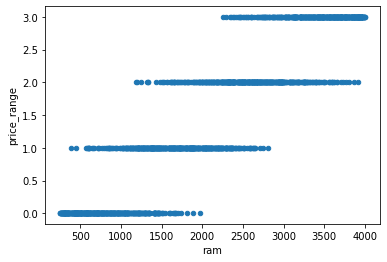

In [14]:
# Scatter plot dengan sumbu x menunjukka nilai ram dan sumbu y menunjukkan nilai dari price_range
ram_values = mobiles['ram']
battery_power_values = mobiles['battery_power']
px_width_values = mobiles['px_width']
px_height_values = mobiles['px_height']
price_range_values = mobiles['price_range']
df = pd.DataFrame({"ram": ram_values, 
                   "battery_power": battery_power_values, 
                   "px_width": px_width_values,
                   "px_height": px_height_values,
                   "price_range": price_range_values})

scatter_plot1 = df.plot.scatter(x='ram', y='price_range')

Bentuk scatter plot seperti di atas menunjukkan price range merupakan data kategorik.
Dari scatter plot seakan terlihat bahwa modus dari price_range adalah 2

In [15]:
df.mode()

ram  battery_power  px_width  px_height  price_range
0  1229          618.0     874.0      347.0          0.0
1  1464         1589.0    1247.0        NaN          1.0
2  2227         1872.0       NaN        NaN          2.0
3  2610            NaN       NaN        NaN          3.0
4  3142            NaN       NaN        NaN          NaN

In [16]:
df.info(verbose='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
ram              2000 non-null int64
battery_power    2000 non-null int64
px_width         2000 non-null int64
px_height        2000 non-null int64
price_range      2000 non-null int64
dtypes: int64(5)
memory usage: 78.2 KB


In [17]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

Ternyata number of occurence dari setiap nilai adalah sama, yaitu 500.

# Buat Machine Learning Model Menggunakan Decision Tree Classifier

Berdasarkan EDA yang telah kita lakukan, kita akan menggunakan 4 fitur saja yaitu: RAM, Battery Power, px_height, dan px_width. Kami akan menggunakan Decision Tree Classifier seperti yang telah dirancang pada proposal. 

Pertama-tama, kita perlu memisahkan dataset menjadi training data dan test data

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(['price_range'], axis = 1)
Y = df['price_range']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3, random_state=1)

Lalu, kita akan training ml model tersebut dengan training data

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import math
dtl = DecisionTreeClassifier()
dtl.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Kemudian, model yang telah kita buat akan diukur akurasinya

In [20]:
ypred = dtl.predict(xtest)
akurasi = accuracy_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = math.sqrt(mse)
print(akurasi, mse, rmse)

0.8683333333333333 0.13166666666666665 0.362859017617954


Model diatas telah siap untuk tahap deployment

In [30]:
input_data = [[3000, 300, 500, 20]] #Ram, battery_power, px_width, px_height
output = dtl.predict(input_data)
print("X=%s, Predicted=%s" % (input_data[0], output[0]))

X=[3000, 300, 500, 20], Predicted=1
